In [1]:
# packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import folium

import librosa
import librosa.display
from IPython.display import Audio

In [ ]:
df = pd.read_csv('../input/birdclef-2025/train.csv')
df_taxo = pd.read_csv('../input/birdclef-2025/taxonomy.csv')

In [4]:
# add taxonomy info to data
df = pd.merge(left=df, right=df_taxo[['primary_label', 'inat_taxon_id', 'class_name']], how='left', on='primary_label')

In [5]:
# preview of data
df.head()

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license,inat_taxon_id,class_name
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,1139490,Insecta
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,1139490,Insecta
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,1192948,Insecta
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.28,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,1192948,Insecta
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,1192948,Insecta


#### Thống kê dữ liệu tọa độ bị thiếu

In [6]:
df.latitude.value_counts()

None        809
4.351       276
-22.4508    225
-14.625     187
-16.5631    186
           ... 
-1.5032       1
-10.309       1
4.7125        1
9.3036        1
-26.6352      1
Name: latitude, Length: 11043, dtype: int64

In [7]:
df.longitude.value_counts()

None         809
-74.652      276
-42.7735     225
-49.0051     187
-49.285      186
            ... 
-84.9283       1
-84.6103       1
-155.8359      1
-75.3971       1
-73.6439       1
Name: longitude, Length: 11050, dtype: int64

In [ ]:
df.latitude = pd.to_numeric(df.latitude.replace(to_replace='None', value=np.nan), errors='coerce')
df.longitude = pd.to_numeric(df.longitude.replace(to_replace='None', value=np.nan), errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28564 entries, 0 to 28563
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     28564 non-null  object 
 1   secondary_labels  28564 non-null  object 
 2   type              28564 non-null  object 
 3   filename          28564 non-null  object 
 4   collection        28564 non-null  object 
 5   rating            28564 non-null  float64
 6   url               28564 non-null  object 
 7   latitude          27755 non-null  float64
 8   longitude         27755 non-null  float64
 9   scientific_name   28564 non-null  object 
 10  common_name       28564 non-null  object 
 11  author            28564 non-null  object 
 12  license           28564 non-null  object 
 13  inat_taxon_id     28564 non-null  int64  
 14  class_name        28564 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 3.5+ MB


In [ ]:
prim_freq = df.primary_label.value_counts()
prim_freq

grekis    990
compau    808
trokin    787
roahaw    709
banana    610
         ... 
66531       2
67082       2
476537      2
42113       2
42087       2
Name: primary_label, Length: 206, dtype: int64

In [ ]:
df.secondary_labels.value_counts()

['']                                          25885
['grekis']                                      254
['whtdov']                                      165
['trokin']                                       83
['banana']                                       63
                                              ...  
['greani1', 'stbwoo2', 'rumfly1']                 1
['orcpar', 'bicwre1']                             1
['bobfly1', 'trokin']                             1
['recwoo1', 'orcpar', 'gybmar']                   1
['pirfly1', 'yebela1', 'banana', 'trokin']        1
Name: secondary_labels, Length: 745, dtype: int64

In [ ]:
df.class_name.value_counts()

Aves        27648
Amphibia      583
Mammalia      178
Insecta       155
Name: class_name, dtype: int64

In [ ]:
df.collection.value_counts()

XC      21204
iNat     7198
CSA       162
Name: collection, dtype: int64

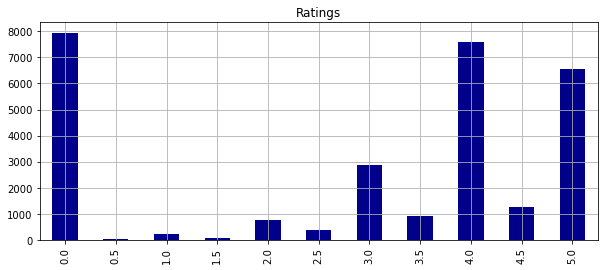

In [ ]:
plt.figure(figsize=(10,4))
df.rating.value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title('Ratings')
plt.grid()
plt.show()

### Phân tích theo vị trí địa lý

In [20]:
classes = df.class_name.value_counts().index.tolist()
print(classes)

['Aves', 'Amphibia', 'Mammalia', 'Insecta']


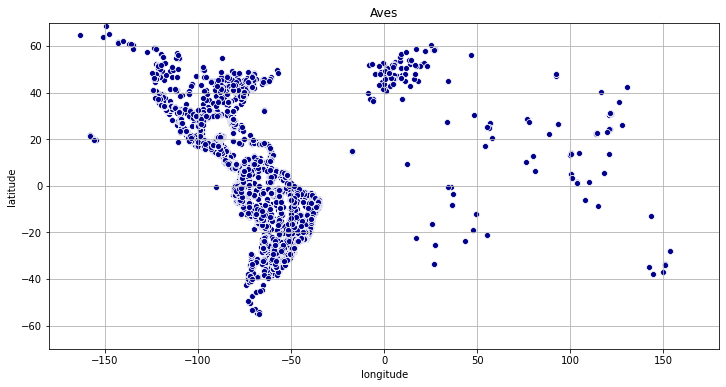

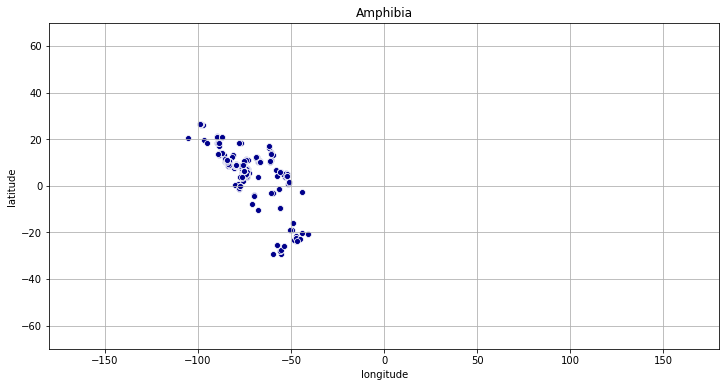

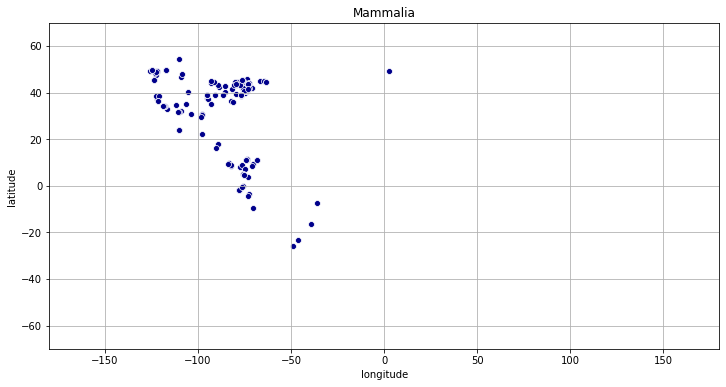

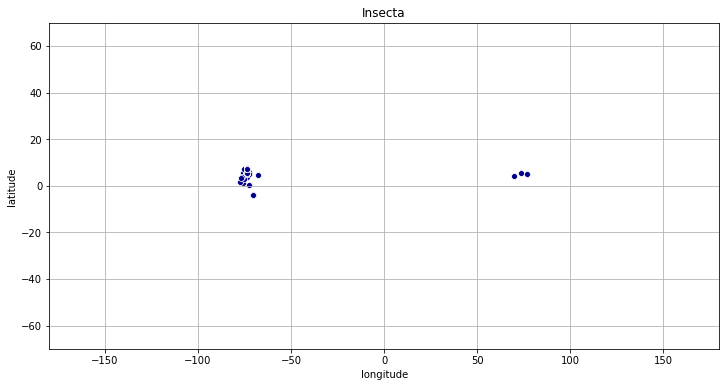

In [21]:
for c in classes:
    df_select = df[df.class_name==c]
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=df_select, x='longitude', y='latitude', 
                    color='darkblue')
    plt.xlim(-180,180)
    plt.ylim(-70,70)
    plt.title(c)
    plt.grid()
    plt.show()

<a id='audio'></a>
# Audio Files

In [ ]:
filename='XC112602.ogg'
y, sr = librosa.load('../input/birdclef-2025/train_audio/banana/' + filename)

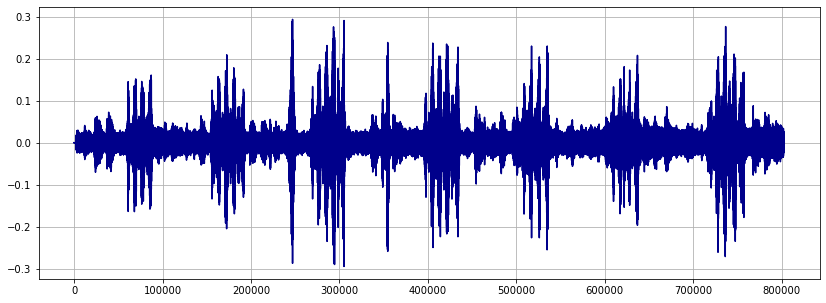

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y, color='darkblue')
plt.grid()
plt.show()

In [30]:
# play sound
Audio(y, rate=sr)

## Spectrogram

In [ ]:
ft = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(ft), ref=np.max)

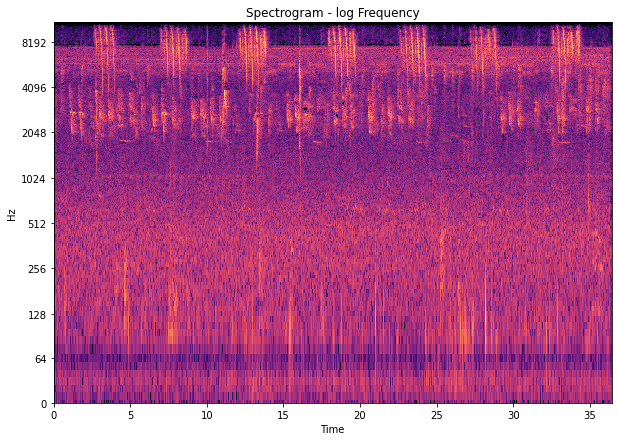

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
img = librosa.display.specshow(S_db, y_axis='log', sr=sr, 
                         x_axis='time', ax=ax)
ax.set(title='Spectrogram - log Frequency')
ax.label_outer()
plt.show()